In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
order_products_train_df = pd.read_csv("Desktop/order_products__train.csv")
order_products_prior_df = pd.read_csv("Desktop//order_products__prior.csv")
orders_df = pd.read_csv("Desktop/orders.csv")
products_df = pd.read_csv("Desktop/products.csv")
aisles_df = pd.read_csv("Desktop/aisles.csv")
departments_df = pd.read_csv("Desktop/departments.csv")

In [4]:
orders_df.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
order_products_prior_df.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train_df.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


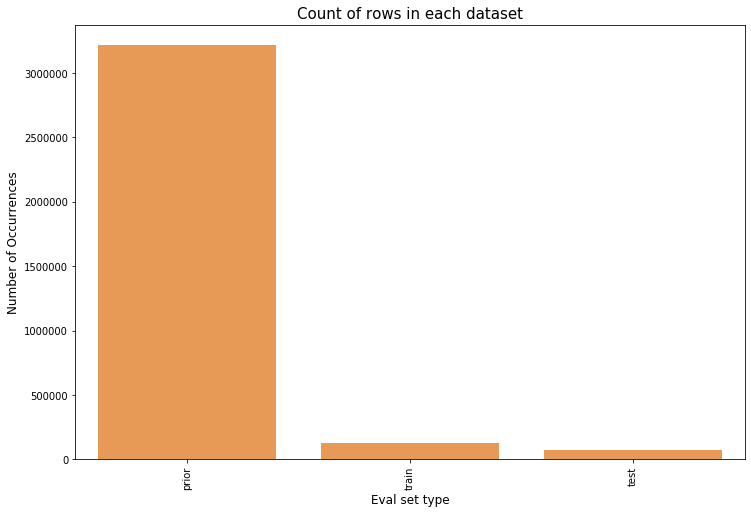

In [7]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

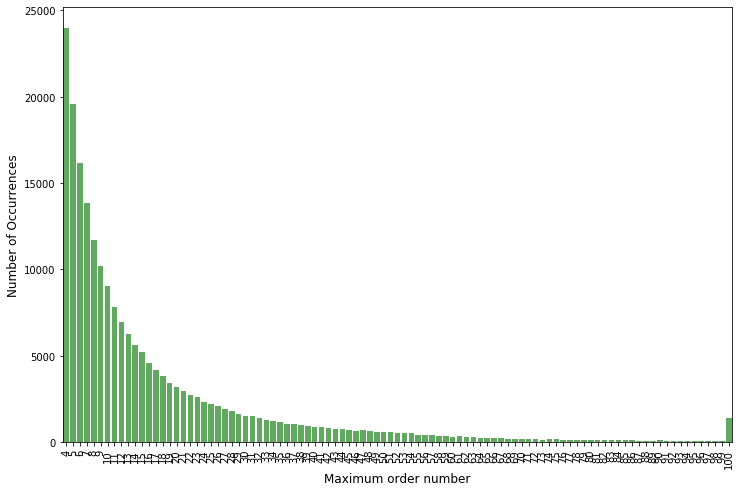

In [9]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

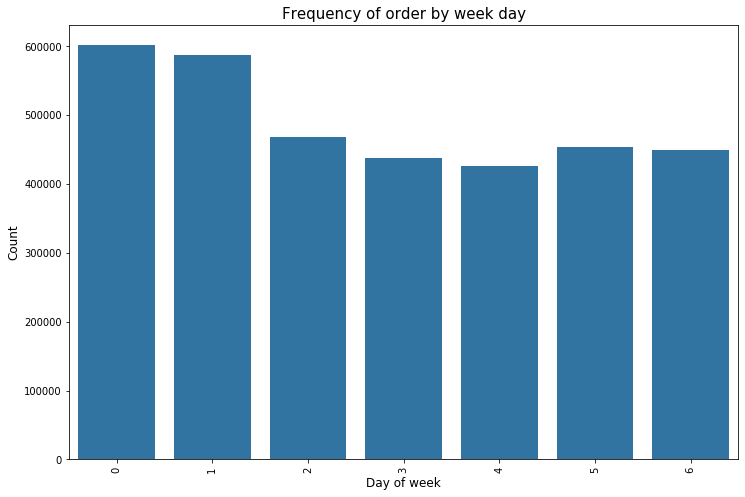

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 is Saturday and Sunday when the orders are high and low during Wednesday.

Now we shall see how the distribution is with respect to time of the day.

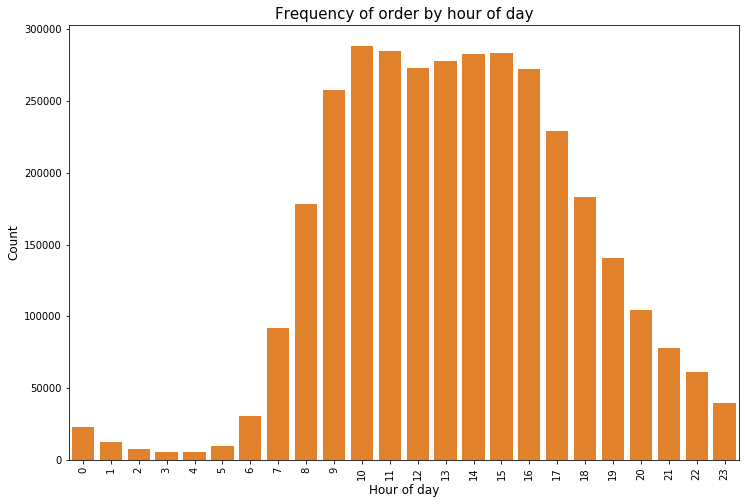

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

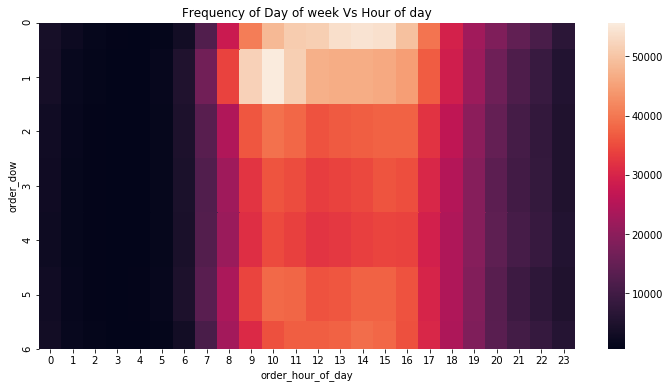

In [12]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

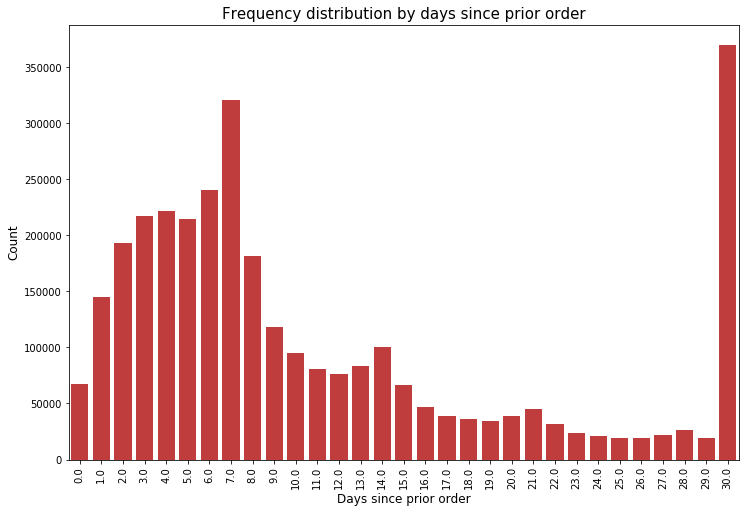

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()


In [14]:
Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

SyntaxError: invalid syntax (<ipython-input-14-b09d22d73615>, line 1)

In [15]:
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]


0.5896974667922161

In [16]:
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]


0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.

No re-ordered products:

Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.



In [17]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [18]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


1    0.93444
0    0.06556
Name: reordered, dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

Now let us see the number of products bought in each order.

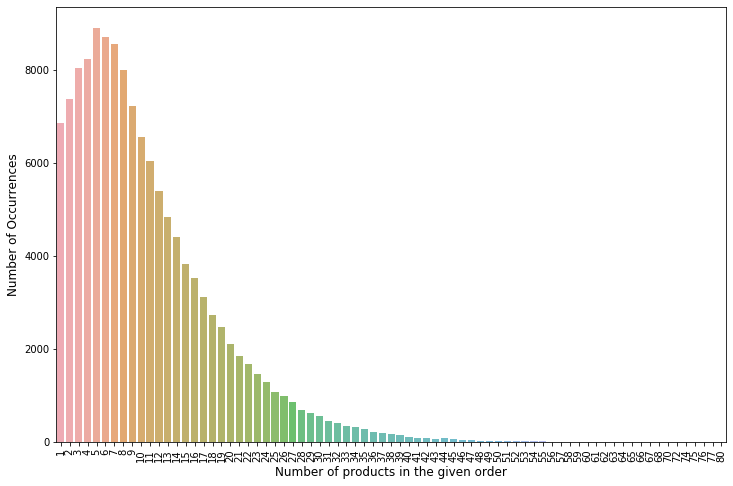

In [19]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


A right tailed distribution with the maximum value at 5.!

Before we explore the product details, let us look at the other three files as well.

In [20]:
products_df.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
aisles_df.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [22]:
departments_df.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [23]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [24]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Wow. Most of them are organic products.! Also majority of them are fruits.

Now let us look at the important aisles.

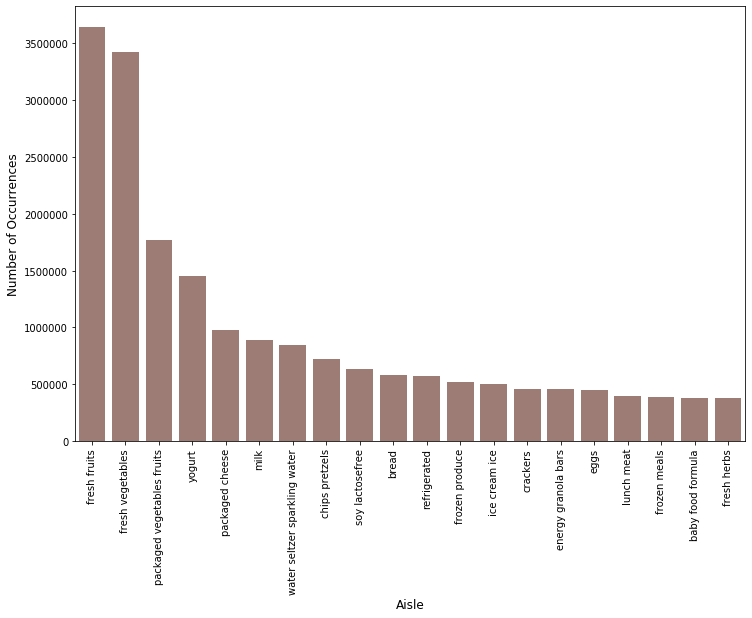

In [25]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


The top two aisles are fresh fruits and fresh vegetables.!

Department Distribution:

Let us now check the department wise distribution.

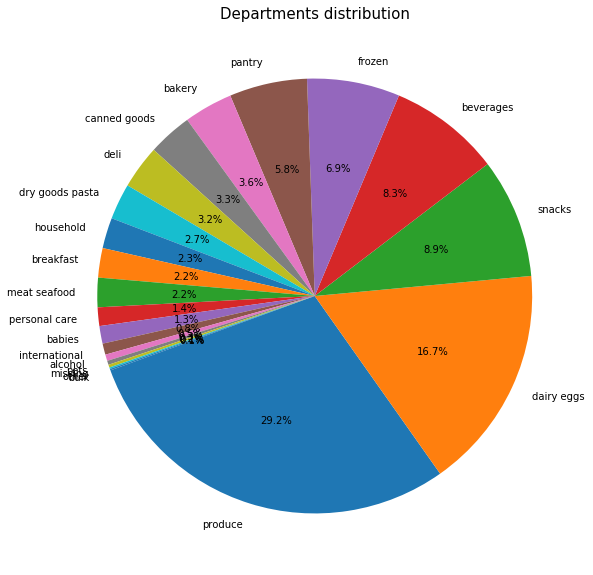

In [26]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reordered percentage of each department.

Department wise reorder ratio:

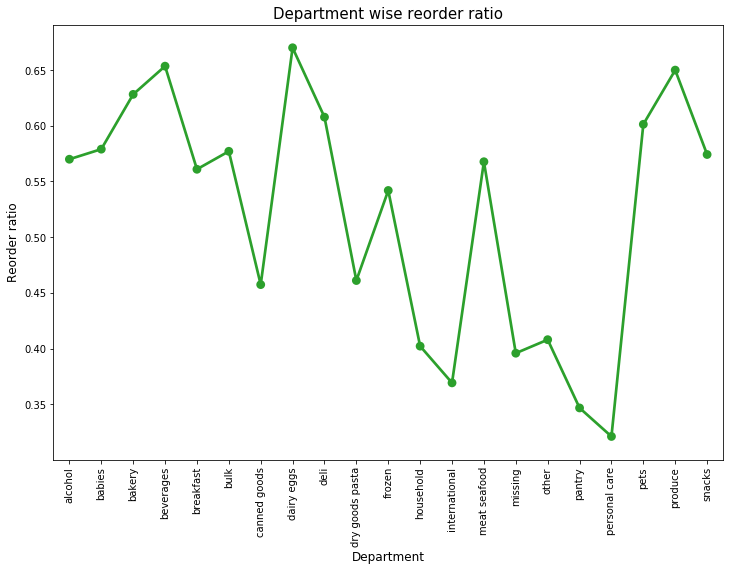

In [27]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

Aisle - Reorder ratio:

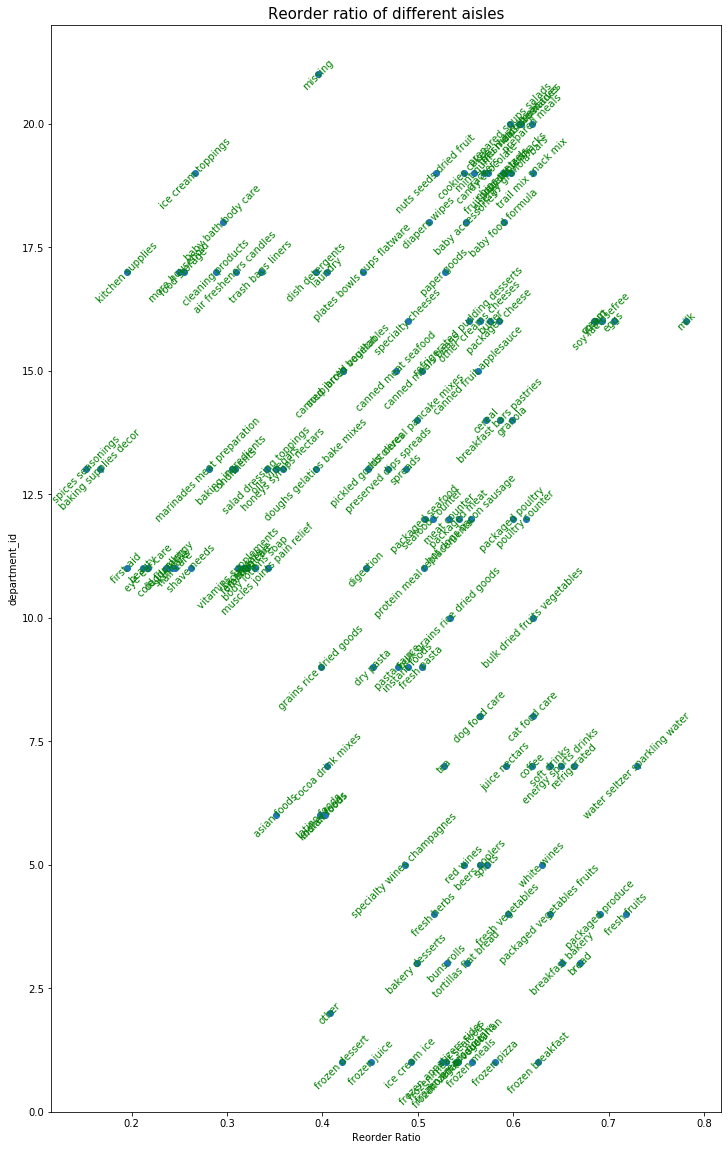

In [28]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()


Add to Cart - Reorder ratio:

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


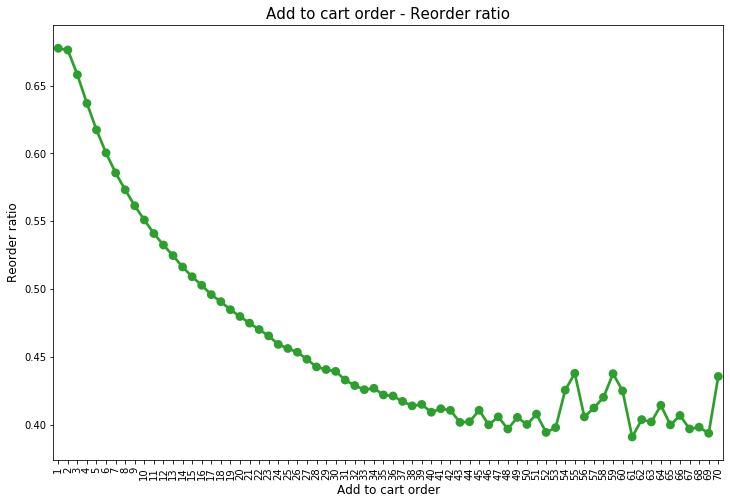

In [29]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

Reorder ratio by Time based variables:

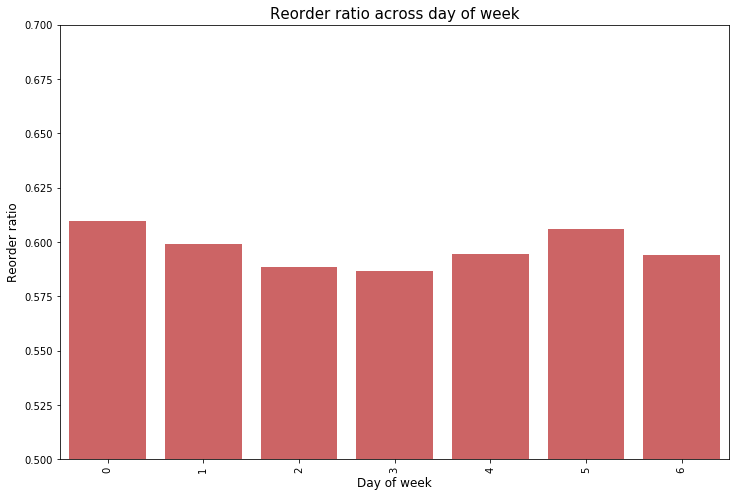

In [30]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

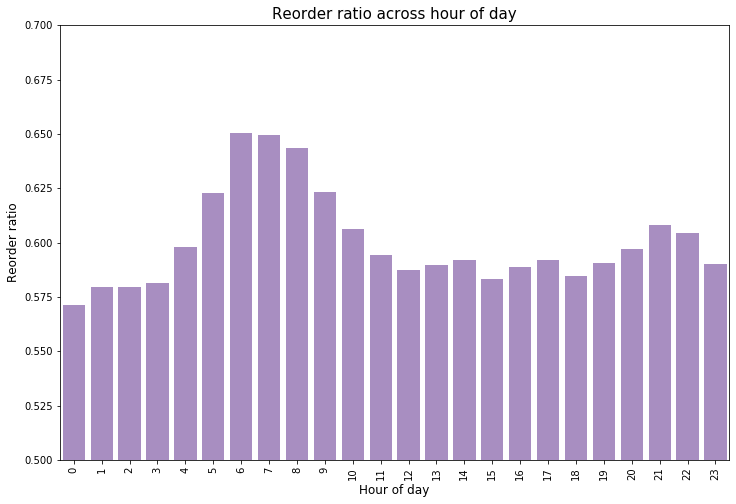

In [31]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

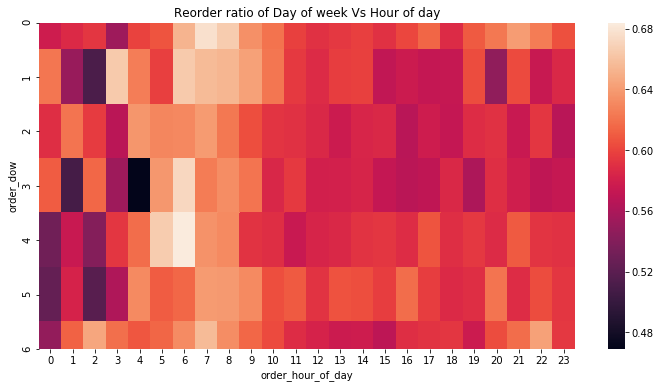

In [32]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

Looks like reorder ratios are quite high during the early mornings compared to later half of the day.



In [36]:
prd = pd.merge(orders_df, order_products_prior_df, on='order_id', how='inner')
prd.head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages,1
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs,2
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks,3
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,4
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,prior,4,2,10,8.0,21150,13,0,Fire Grilled Steak Bowl,38,1,frozen meals,frozen,13
96,1673511,2,prior,5,3,11,8.0,47144,1,0,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs,1
97,1673511,2,prior,5,3,11,8.0,5322,2,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,3,19,energy granola bars,snacks,2
98,1673511,2,prior,5,3,11,8.0,17224,3,0,Oats & Honey Gluten Free Granola,3,19,energy granola bars,snacks,3


In [37]:
prd[prd.user_id==1].head(45)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages,1
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs,2
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks,3
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,4
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household,5
5,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks,2
7,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks,3
8,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce,4
9,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,5


In [38]:
prd['order_number_back'] = prd.groupby('user_id')['order_number'].transform(max) - prd.order_number +1 
prd.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,order_number_back
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages,1,10
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs,2,10
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks,3,10
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,4,10
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household,5,10
5,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages,1,9
6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks,2,9
7,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks,3,9
8,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce,4,9
9,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,5,9


In [39]:
prd[prd.user_id==30].head(10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,order_number_back
3650,375303,30,prior,1,1,13,NaN,21386,1,0,Smartwater,115,7,water seltzer sparkling water,beverages,1,8
3651,375303,30,prior,1,1,13,NaN,27839,2,0,49 Flavors Jelly Belly Jelly Beans,45,19,candy chocolate,snacks,2,8
3652,375303,30,prior,1,1,13,NaN,45128,3,0,Milk Chocolate M&Ms,45,19,candy chocolate,snacks,3,8
3653,2156000,30,prior,2,1,10,7.0,21386,1,1,Smartwater,115,7,water seltzer sparkling water,beverages,1,7
3654,3169631,30,prior,3,1,22,7.0,21386,1,1,Smartwater,115,7,water seltzer sparkling water,beverages,1,6
3655,1645927,30,prior,4,2,13,22.0,21386,1,1,Smartwater,115,7,water seltzer sparkling water,beverages,1,5
3656,986094,30,prior,5,2,11,30.0,21386,1,1,Smartwater,115,7,water seltzer sparkling water,beverages,1,4
3657,2299885,30,prior,6,1,19,27.0,6184,1,0,Clementines,32,4,packaged produce,produce,1,3
3658,137318,30,prior,7,1,6,28.0,38300,1,0,Tall Kitchen Bag With Febreze Odor Shield,60,17,trash bags liners,household,1,2
3659,3333738,30,prior,8,1,8,30.0,38300,1,1,Tall Kitchen Bag With Febreze Odor Shield,60,17,trash bags liners,household,1,1


In [40]:
prd5 = prd[prd.order_number_back <= 5]
prd5.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,order_number_back
29,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,soft drinks,beverages,1,5
30,3367565,1,prior,6,2,7,19.0,12427,2,1,Original Beef Jerky,23,19,popcorn jerky,snacks,2,5
31,3367565,1,prior,6,2,7,19.0,10258,3,1,Pistachios,117,19,nuts seeds dried fruit,snacks,3,5
32,3367565,1,prior,6,2,7,19.0,25133,4,1,Organic String Cheese,21,16,packaged cheese,dairy eggs,4,5
33,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,soft drinks,beverages,1,4
34,550135,1,prior,7,1,9,20.0,10258,2,1,Pistachios,117,19,nuts seeds dried fruit,snacks,2,4
35,550135,1,prior,7,1,9,20.0,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks,3,4
36,550135,1,prior,7,1,9,20.0,25133,4,1,Organic String Cheese,21,16,packaged cheese,dairy eggs,4,4
37,550135,1,prior,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,121,14,cereal,breakfast,5,4
38,3108588,1,prior,8,1,14,14.0,12427,1,1,Original Beef Jerky,23,19,popcorn jerky,snacks,1,3


In [41]:
last_five = prd5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five.head(10)

times_last5
user_id product_id             
1       196                   5
        10258                 5
        12427                 5
        13032                 2
        25133                 5
        35951                 1
        38928                 1
        39657                 1
        46149                 3
        49235                 2

In [42]:
last_five['times_last5_ratio'] = last_five.times_last5 / 5
last_five.head(10)

times_last5  times_last5_ratio
user_id product_id                                
1       196                   5                1.0
        10258                 5                1.0
        12427                 5                1.0
        13032                 2                0.4
        25133                 5                1.0
        35951                 1                0.2
        38928                 1                0.2
        39657                 1                0.2
        46149                 3                0.6
        49235                 2                0.4

In [43]:
prd[prd.user_id==5]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,order_number_back
360,2717275,5,prior,1,3,12,NaN,15349,1,0,Organic Raw Agave Nectar,29,13,honeys syrups nectars,pantry,1,4
361,2717275,5,prior,1,3,12,NaN,21413,2,0,Organic Soba,66,6,asian foods,international,2,4
362,2717275,5,prior,1,3,12,NaN,48775,3,0,Organic Red Cabbage,83,4,fresh vegetables,produce,3,4
363,2717275,5,prior,1,3,12,NaN,28289,4,0,Organic Shredded Carrots,123,4,packaged vegetables fruits,produce,4,4
364,2717275,5,prior,1,3,12,NaN,8518,5,0,Organic Red Onion,83,4,fresh vegetables,produce,5,4
365,2717275,5,prior,1,3,12,NaN,11777,6,0,Red Raspberries,123,4,packaged vegetables fruits,produce,6,4
366,2717275,5,prior,1,3,12,NaN,31717,7,0,Organic Cilantro,16,4,fresh herbs,produce,7,4
367,2717275,5,prior,1,3,12,NaN,26604,8,0,Organic Blackberries,24,4,fresh fruits,produce,8,4
368,2717275,5,prior,1,3,12,NaN,43693,9,0,Whole Vitamin D Milk,84,16,milk,dairy eggs,9,4
369,2717275,5,prior,1,3,12,NaN,22475,10,0,Jicama,83,4,fresh vegetables,produce,10,4


In [44]:
prd5_with_five_orders = prd5.groupby('user_id').filter(lambda x: x.order_id.nunique() == 5)


In [45]:
prd5_with_five_orders[prd5_with_five_orders.user_id==5]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,order_number_back


In [46]:
last_five_top = last_five[last_five.times_last5_ratio == 1].groupby('product_id')[['times_last5_ratio']].count()
last_five_top.columns = ['total_users']
last_five_top.head()

,total_users
product_id,
1,2
3,1
10,7
12,1
23,3


In [47]:
last_five_top = last_five_top.sort_values(by='total_users', ascending=False)
last_five_top = last_five_top.iloc[0:20]
last_five_top = last_five_top.reset_index()
last_five_top

,product_id,total_users
0,24852,5215
1,13176,3925
2,47766,1237
3,27845,1216
4,47209,1164
5,21137,1016
6,21903,978
7,27966,800
8,19660,791
9,16797,665


In [49]:
last_five_top_names = pd.merge(last_five_top, products_df, how='left')
last_five_top_names

,product_id,total_users,product_name,aisle_id,department_id
0,24852,5215,Banana,24,4
1,13176,3925,Bag of Organic Bananas,24,4
2,47766,1237,Organic Avocado,24,4
3,27845,1216,Organic Whole Milk,84,16
4,47209,1164,Organic Hass Avocado,24,4
5,21137,1016,Organic Strawberries,24,4
6,21903,978,Organic Baby Spinach,123,4
7,27966,800,Organic Raspberries,123,4
8,19660,791,Spring Water,115,7
9,16797,665,Strawberries,24,4


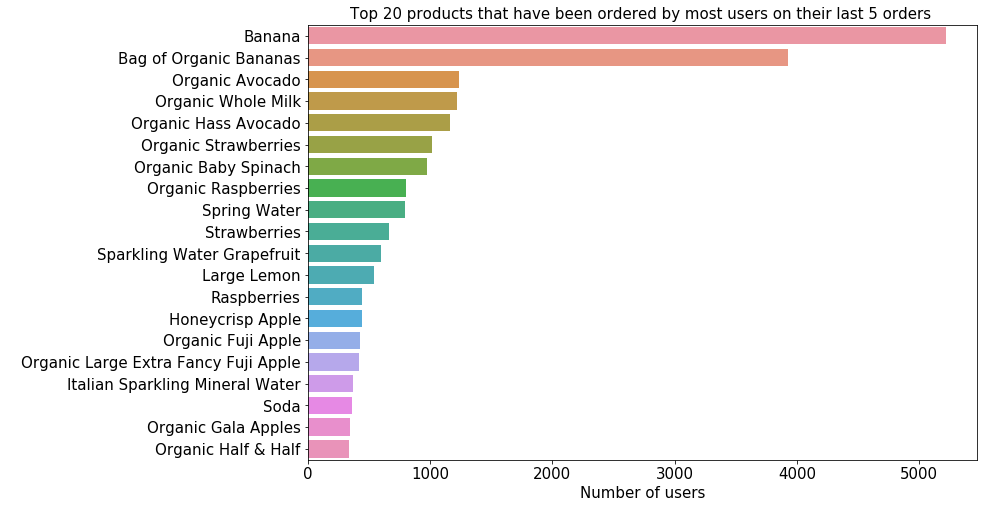

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(last_five_top_names.total_users, last_five_top_names.product_name)
# add label to x-axis
plt.xlabel('Number of users', size=15)
# keep y-axis free of label
plt.ylabel('  ')
#put a title
plt.title('Top 20 products that have been ordered by most users on their last 5 orders ', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()